In [1]:
import osiris_utils as utils
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
plt.rcParams['font.size'] = 14

In [2]:
shot = "000055"

# read data 

folder_path = Path("/home/exxxx5/Tese/Decks/WeibelTestElectronsEI_B0_1/")

b1_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b1/b1-" + shot + ".h5")
    )

b2_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b2/b2-" + shot + ".h5")
    )

b3_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b3/b3-" + shot + ".h5")
    )

e1_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e1/e1-" + shot + ".h5")
    )

e2_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e2/e2-" + shot + ".h5")
    )

e3_original = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e3/e3-" + shot + ".h5")
    )



In [3]:
shot = "000000"

# read data 

folder_path = Path("/home/exxxx5/Tese/Decks/BGWeibelTestElectronsEI_B0_1/")

b1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b1/b1-" + shot + ".h5")
    )

b2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b2/b2-" + shot + ".h5")
    )

b3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b3/b3-" + shot + ".h5")
    )

e1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e1/e1-" + shot + ".h5")
    )

e2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e2/e2-" + shot + ".h5")
    )

e3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e3/e3-" + shot + ".h5")
    )


part_b1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_b1/part_b1-" + shot + ".h5")
    )

part_b2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_b2/part_b2-" + shot + ".h5")
    )

part_b3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_b3/part_b3-" + shot + ".h5")
    )

part_e1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_e1/part_e1-" + shot + ".h5")
    )

part_e2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_e2/part_e2-" + shot + ".h5")
    )

part_e3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/part_e3/part_e3-" + shot + ".h5")
    )


ext_b1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_b1/ext_b1-" + shot + ".h5")
    )

ext_b2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_b2/ext_b2-" + shot + ".h5")
    )

ext_b3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_b3/ext_b3-" + shot + ".h5")
    )

ext_e1_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_e1/ext_e1-" + shot + ".h5")
    )

ext_e2_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_e2/ext_e2-" + shot + ".h5")
    )

ext_e3_bg = utils.OsirisGridFile(
    folder_path / ("MS/FLD/ext_e3/ext_e3-" + shot + ".h5")
    )


In [4]:
# field and charge maps


def plot(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for the first subplot
    im1 = ax1.imshow(data.data[:,:,40].T, aspect="auto", origin="lower", cmap="Reds", extent=[data.grid[0][0], data.grid[0][1], data.grid[1][0], data.grid[1][1]])
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.set_label(r"${}$".format(data.label) + r"$\  [{}]$".format(data.units))
    ax1.set_title(r"$t={:.2f}$".format(data.time[0]) + r"$\  [{}]$".format(data.time[1]))
    ax1.set_xlabel(r"${}$".format(data.axis[0]["long_name"]) + r"$\  [{}]$".format(data.axis[0]["units"]))
    ax1.set_ylabel(r"${}$".format(data.axis[1]["long_name"]) + r"$\  [{}]$".format(data.axis[1]["units"]))

    # Plot for the second subplot
    im2 = ax2.imshow(data.data[40,:,:].T, aspect="auto", origin="lower", cmap="Reds", extent=[data.grid[1][0], data.grid[1][1], data.grid[2][0], data.grid[2][1]])
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.set_label(r"${}$".format(data.label) + r"$\  [{}]$".format(data.units))
    ax2.set_title(r"$t={:.2f}$".format(data.time[0]) + r"$\  [{}]$".format(data.time[1]))
    ax2.set_xlabel(r"${}$".format(data.axis[1]["long_name"]) + r"$\  [{}]$".format(data.axis[1]["units"]))
    ax2.set_ylabel(r"${}$".format(data.axis[2]["long_name"]) + r"$\  [{}]$".format(data.axis[2]["units"]))

    return fig, ax1, ax2



def plot_subtraction(data_class1, data_class2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for the first subplot
    im1 = ax1.imshow(data_class1.data[:,:,40].T - data_class2.data[:,:,40].T, aspect="auto", origin="lower", cmap="Reds", extent=[data_class1.grid[0][0], data_class1.grid[0][1], data_class1.grid[1][0], data_class1.grid[1][1]])
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.set_label(r"${}$".format(data_class1.label) + r"$\  [{}]$".format(data_class1.units))
    ax1.set_title(r"$t={:.2f}$".format(data_class1.time[0]) + r"$\  [{}]$".format(data_class1.time[1]))
    ax1.set_xlabel(r"${}$".format(data_class1.axis[0]["long_name"]) + r"$\  [{}]$".format(data_class1.axis[0]["units"]))
    ax1.set_ylabel(r"${}$".format(data_class1.axis[1]["long_name"]) + r"$\  [{}]$".format(data_class1.axis[1]["units"]))

    # Plot for the second subplot
    im2 = ax2.imshow(data_class1.data[40,:,:].T - data_class2.data[40,:,:].T, aspect="auto", origin="lower", cmap="Reds", extent=[data_class1.grid[1][0], data_class1.grid[1][1], data_class1.grid[2][0], data_class1.grid[2][1]])
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.set_label(r"${}$".format(data_class1.label) + r"$\  [{}]$".format(data_class1.units))
    ax2.set_title(r"$t={:.2f}$".format(data_class1.time[0]) + r"$\  [{}]$".format(data_class1.time[1]))
    ax2.set_xlabel(r"${}$".format(data_class1.axis[1]["long_name"]) + r"$\  [{}]$".format(data_class1.axis[1]["units"]))
    ax2.set_ylabel(r"${}$".format(data_class1.axis[2]["long_name"]) + r"$\  [{}]$".format(data_class1.axis[2]["units"]))

    return fig, ax1, ax2



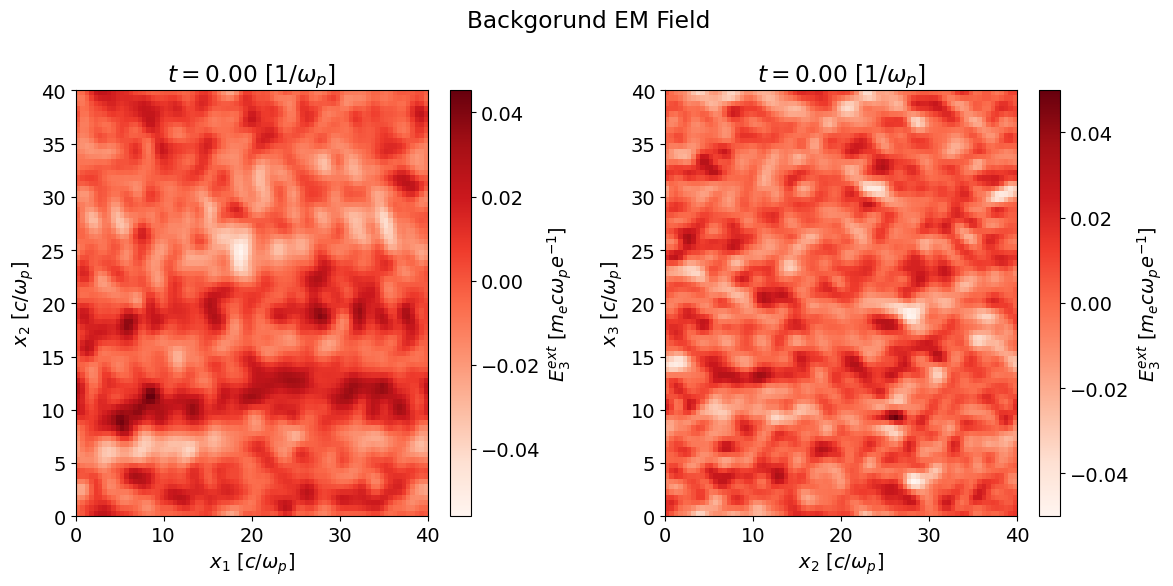

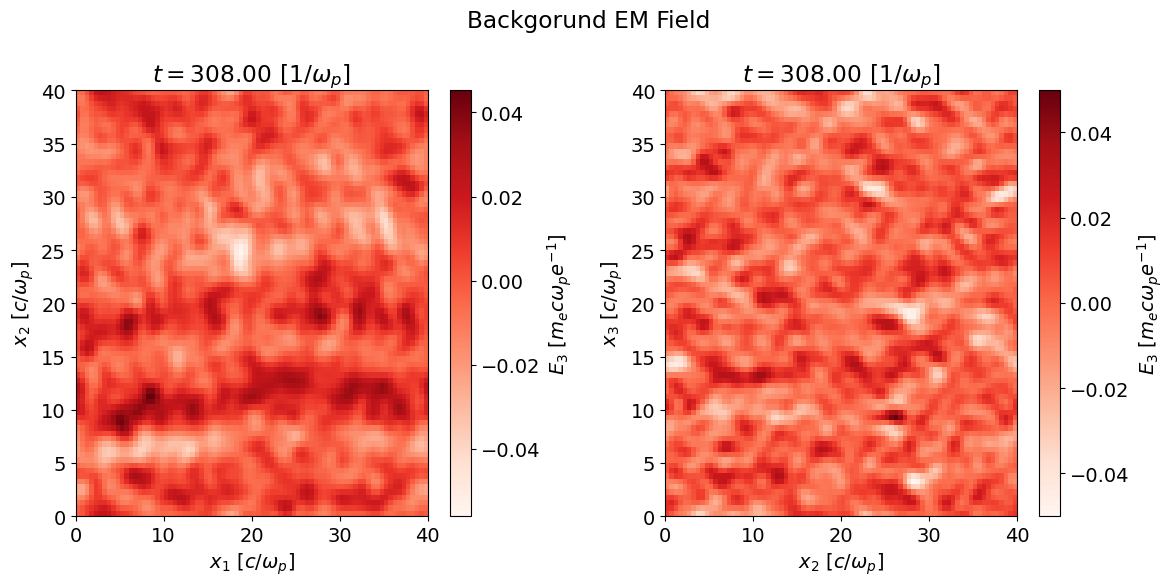

In [5]:
fig, ax1, ax2 = plot(ext_e3_bg)
fig.suptitle("Backgorund EM Field")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot(e3_original)
fig.suptitle("Backgorund EM Field")
plt.tight_layout()
plt.show()

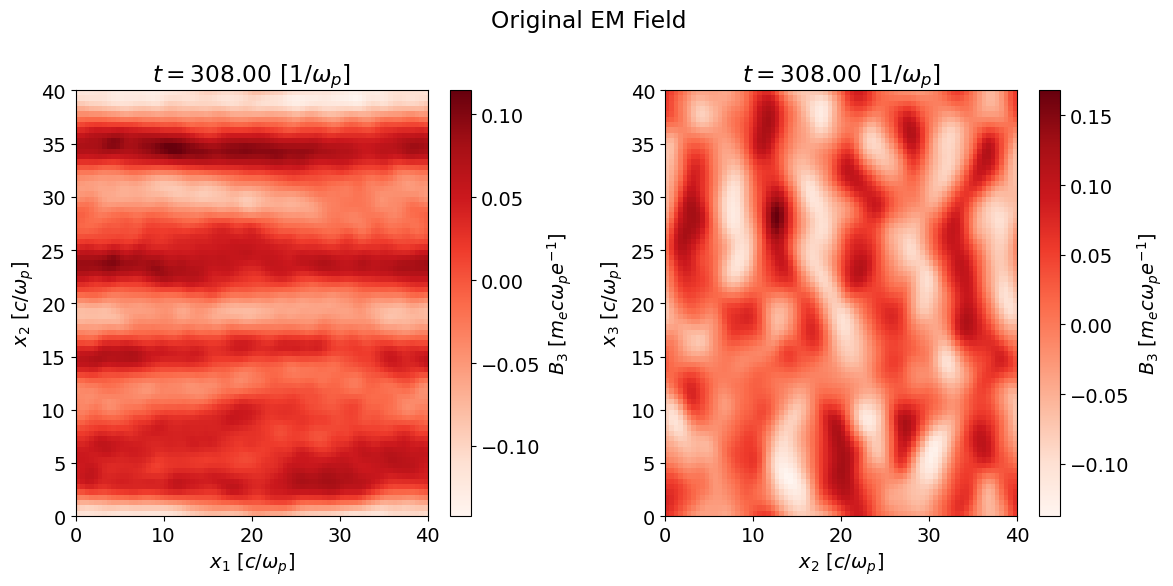

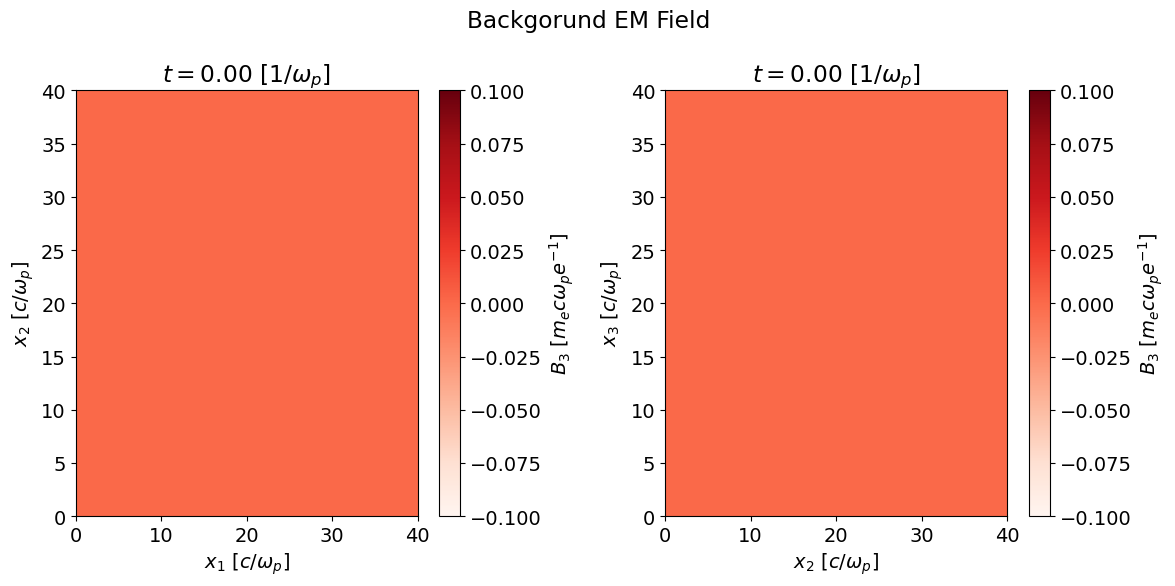

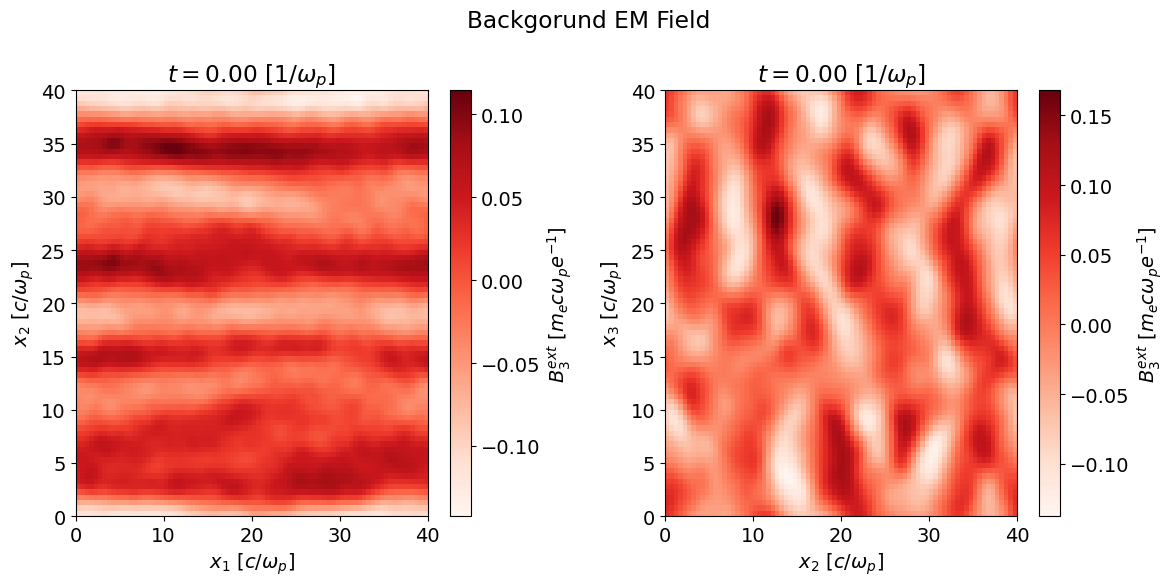

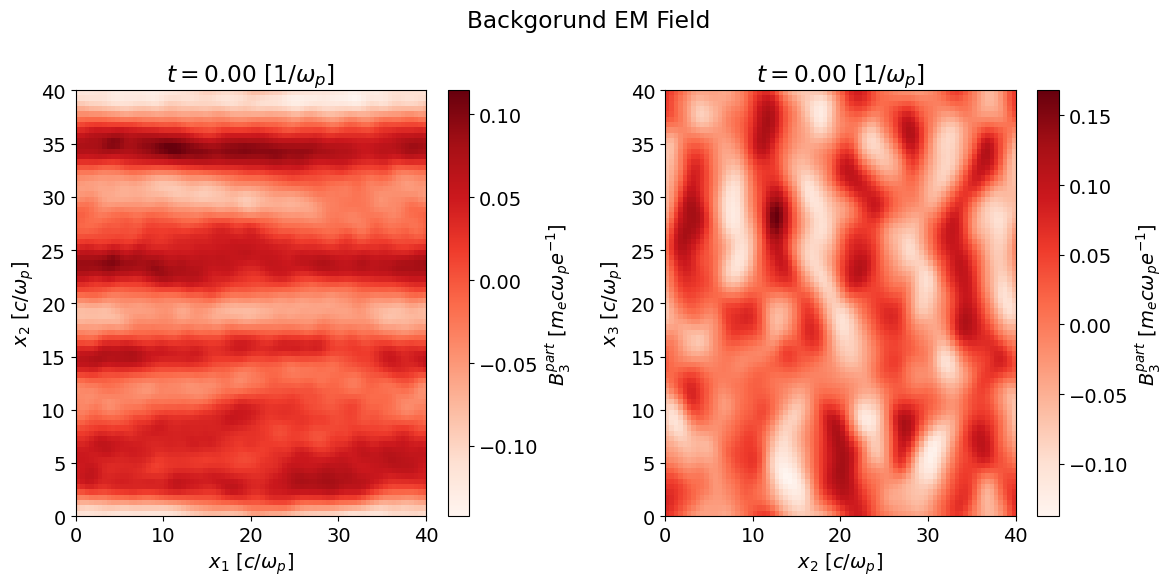

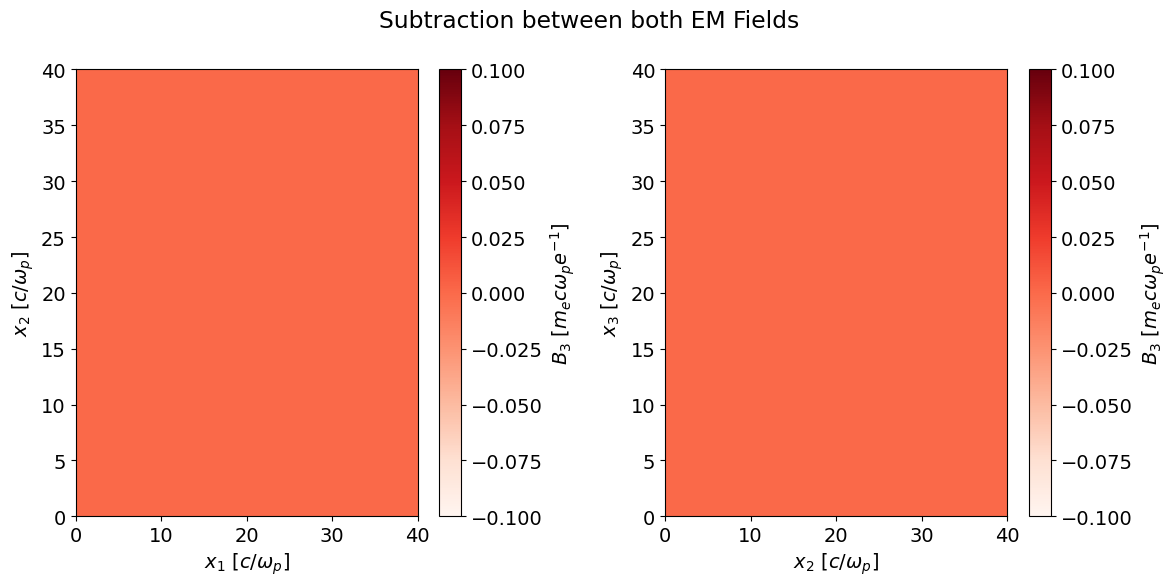

In [6]:
fig, ax1, ax2 = plot(b3_original)
fig.suptitle("Original EM Field")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot(b3_bg)
fig.suptitle("Backgorund EM Field")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot(ext_b3_bg)
fig.suptitle("Backgorund EM Field")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot(part_b3_bg)
fig.suptitle("Backgorund EM Field")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot_subtraction(b3_original, ext_b3_bg)
ax1.set_title("")
ax2.set_title("")
fig.suptitle("Subtraction between both EM Fields")
plt.tight_layout()
plt.show()
